# 케라스 보스턴 주택 가격 모델

### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [56]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=111)

### 데이터 확인

In [57]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [58]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [59]:
print(y_train_full[0])

25.0


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [60]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

In [61]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [62]:
model = Sequential([Dense(100, activation='relu', input_shape=(13,), name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='output'),])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 100)               1400      
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


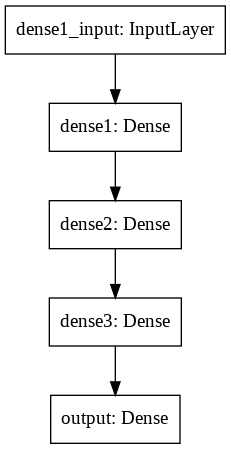

In [64]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [65]:
model.compile(loss='mse',
              optimizer =Adam(learning_rate=1e-2),
              metrics=['mae'])

### 모델 학습

In [66]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 0s 14ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 12.5112 -

### 모델 평가 
- `evaluate()`

In [67]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 13.6104 - mae: 2.5823


[13.610373497009277, 2.58229923248291]

In [68]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


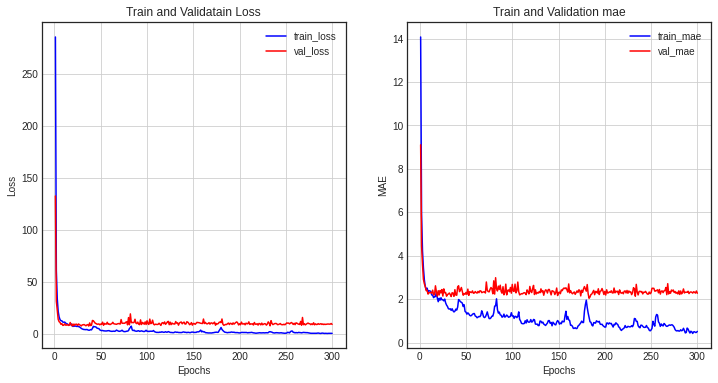

In [69]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color='red', label = 'val_loss')
ax1.set_title('Train and Validatain Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']


ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color='red', label = 'val_mae')
ax2.set_title('Train and Validation mae')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [43]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [77]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2,
                                                           seed=999)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

In [78]:
k = 3

kfold = KFold(n_splits=k, random_state=999)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [79]:
def build_model():
  input = Input(shape=(13,), name='input')
  hidden1 = Dense(100, activation='relu', name='dense1')(input)
  hidden2 = Dense(64, activation='relu', name='dense2')(hidden1)
  hidden3 = Dense(32, activation='relu', name='dense3')(hidden2)
  output = Dense(1, name='output')(hidden3)

  model = Model(inputs=[input], outputs=output)
  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])
  return model

In [73]:
mae_list = []

In [80]:
for train_idx, val_idx in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
  y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]

  model = build_model()
  model.fit(x_train_fold, y_train_fold, epochs=300,
            validation_data=(x_val_fold,y_val_fold))
)
  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
6/6 [==============================] - 0s 21ms/step - loss: 591.5529 - mae: 22.2828 - val_loss: 499.1812 - val_mae: 21.3135
Epoch 2/300
6/6 [==============================] - 0s 5ms/step - loss: 559.5750 - mae: 21.5467 - val_loss: 462.9698 - val_mae: 20.4397
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 515.8015 - mae: 20.5254 - val_loss: 414.1726 - val_mae: 19.1941
Epoch 4/300
6/6 [==============================] - 0s 6ms/step - loss: 457.6597 - mae: 19.0488 - val_loss: 350.7442 - val_mae: 17.4261
Epoch 5/300
6/6 [==============================] - 0s 4ms/step - loss: 386.4793 - mae: 16.9791 - val_loss: 272.7507 - val_mae: 14.9787
Epoch 6/300
6/6 [==============================] - 0s 4ms/step - loss: 300.1908 - mae: 14.2868 - val_loss: 189.4414 - val_mae: 11.9275
Epoch 7/300
6/6 [==============================] - 0s 4ms/step - loss: 217.7406 - mae: 11.5992 - val_loss: 120.0653 - val_mae: 9.1938
Epoch 8/300
6/6 [==============================] - 0s 4

In [81]:
print(mae_list)

[10.339824676513672, 10.2059965133667, 10.327354431152344, 10.405708312988281, 8.82997989654541, 7.902921199798584]


In [82]:
print(np.mean(mae_list))

9.668630838394165
